In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_tab_train = pd.concat([total,percent],axis=1,keys=["Total Missing","Percent"])
print(missing_tab_train.head(30))

              Total Missing   Percent
PoolQC                 1453  0.995205
MiscFeature            1406  0.963014
Alley                  1369  0.937671
Fence                  1179  0.807534
FireplaceQu             690  0.472603
LotFrontage             259  0.177397
GarageYrBlt              81  0.055479
GarageCond               81  0.055479
GarageType               81  0.055479
GarageFinish             81  0.055479
GarageQual               81  0.055479
BsmtFinType2             38  0.026027
BsmtExposure             38  0.026027
BsmtQual                 37  0.025342
BsmtCond                 37  0.025342
BsmtFinType1             37  0.025342
MasVnrArea                8  0.005479
MasVnrType                8  0.005479
Electrical                1  0.000685
Id                        0  0.000000
Functional                0  0.000000
Fireplaces                0  0.000000
KitchenQual               0  0.000000
KitchenAbvGr              0  0.000000
BedroomAbvGr              0  0.000000
HalfBath    

In [6]:
#Dropping Columns with more than 80% missing values and ID because ID will not have bigger impact predicting the sales price 
train_data = train_data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [7]:
train_data["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [8]:
#Replacing nan with None
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("None")

In [11]:
#Checking LotFrontage column
train_data["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [12]:
#Replacing nan with mean
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean())

In [13]:
#Checking GarageCond column
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [14]:
#Replacing Null value in GarageCond with None
train_data['GarageCond']=train_data['GarageCond'].fillna('None')

In [15]:
#Checking GarageQual column
train_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [16]:
#Replacing the null value with none in GarageQual
train_data['GarageQual']=train_data['GarageQual'].fillna('None')

In [17]:
#Checking GarageFinish Column
train_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [18]:
#Replacing the Null value with None
train_data['GarageFinish']=train_data['GarageFinish'].fillna('None')

In [19]:
#Checking GarageYrBlt column
train_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [20]:
#Replacing the Null Value with median
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

In [21]:
#Checking Garage Type column
train_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [22]:
#Replacing Null Value with None
train_data['GarageType']=train_data['GarageType'].fillna('None')

In [23]:
#Checking BsmtFinType2 column
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [24]:
#Replacing Null value with None
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('None')

In [25]:
#Checking BsmtFinType1 column
train_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [26]:
#Replacing Null Value with None
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna("None")

In [27]:
#Checking BsmtExposure Column
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [28]:
#Replacing null value with None
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('None')

In [29]:
#Checking BsmtCond Column
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [30]:
#Replacing Null Value with None
train_data['BsmtCond']=train_data['BsmtCond'].fillna('None')

In [31]:
#Checking BsmtQual column
train_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [32]:
#Replacing Null value with None
train_data['BsmtQual']=train_data['BsmtQual'].fillna('None')

In [33]:
#Checking MasVnrArea column
train_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [34]:
#Repalcing Null value with Zero(0)
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)

In [35]:
#Checking MasVnrType Column
train_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [36]:
#Replacing Null value with Others as there already is a value called None
train_data['MasVnrType']=train_data['MasVnrArea'].fillna("Others")

In [37]:
#Checking Electrical column
train_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [38]:
#Replacing the Null value with None
train_data['Electrical']=train_data['Electrical'].fillna('None')

<AxesSubplot:>

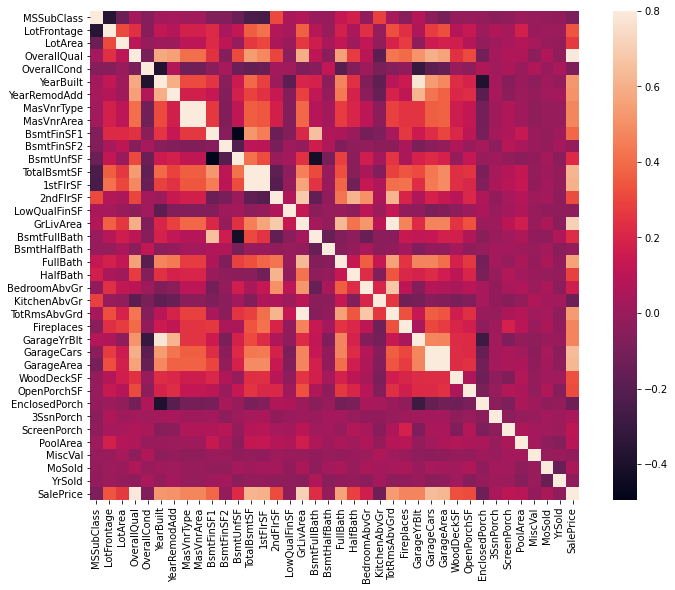

In [40]:
# correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square = True)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

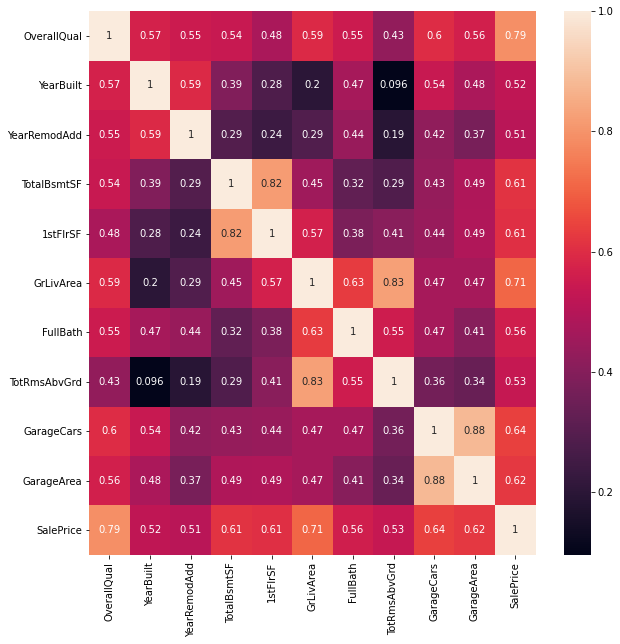

In [42]:
# most correlated features 
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train_data[top_corr_features].corr(),annot = True);
top_corr_features

These are the features most correlated with the 'SalePrice'.
OverallQual & GrLivArea are strongly correlated with the 'SalePrice'.

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

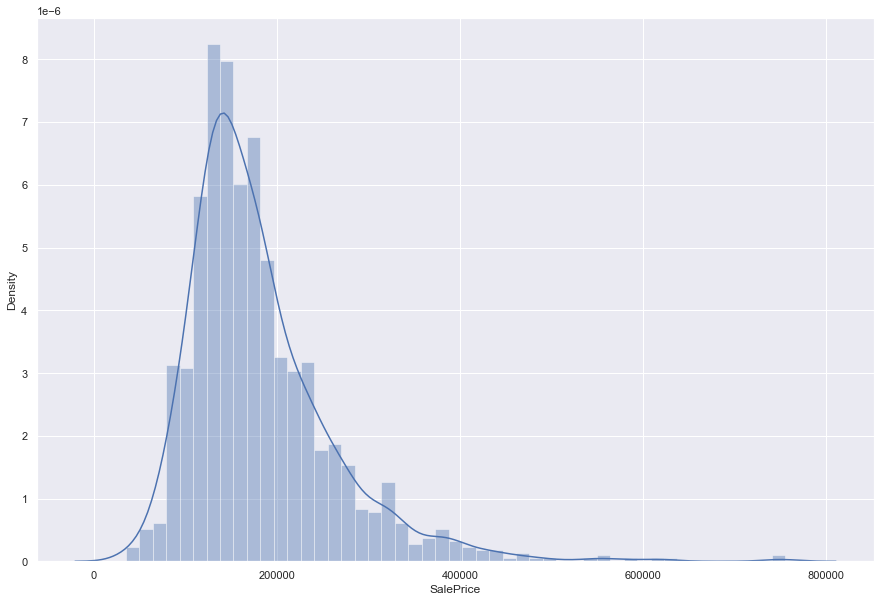

In [46]:
#histogram for distribution
sns.distplot(train_data["SalePrice"])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

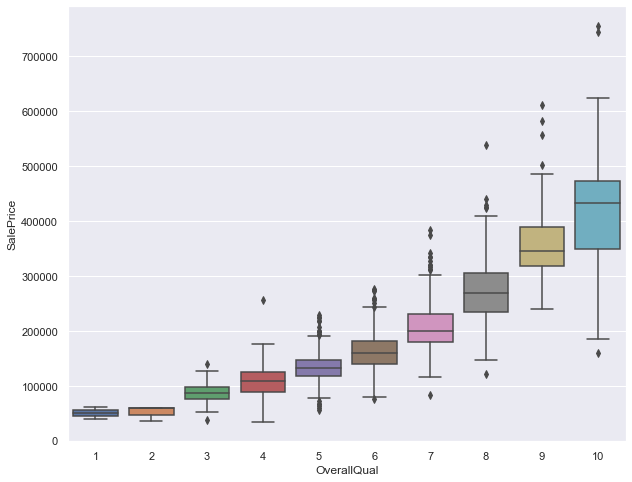

In [43]:
#BoxPlot for OverallQual Column
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)

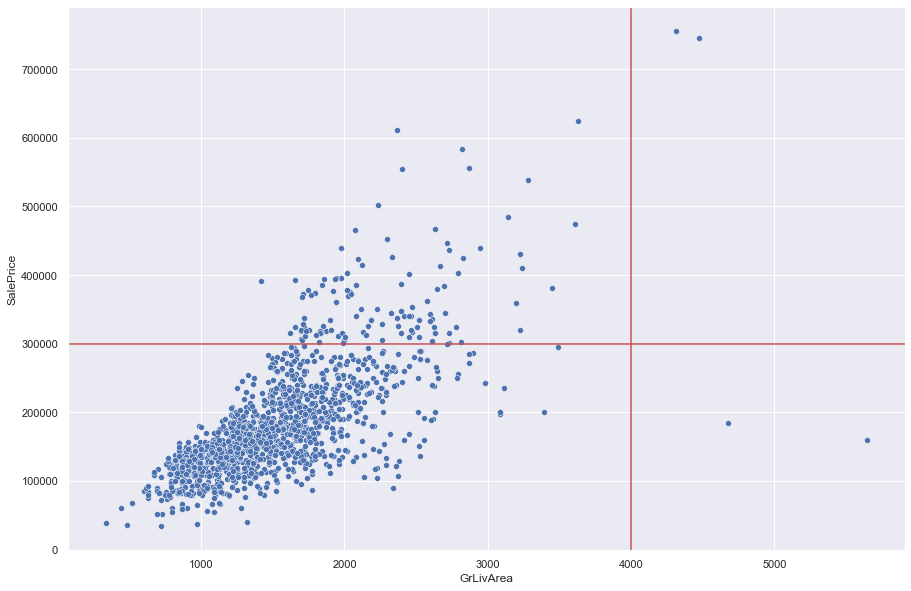

In [48]:
#ScatterPlot for GrtLivArea
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)
plt.axhline(y=300000,color='r')
plt.axvline(x=4000,color='r')

In [ ]:
#Deleting Outliers
train_data=train_data.drop(train_data[(train_data['GrLivArea']>4000)&(train_data['SalePrice']>300000)].index)

In [49]:
#Dropping Columns because bescause they were dropped in Training data
test_id=test_data['Id']
test_data=test_data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [50]:
#Converting String into Number
new_train_data=train_data.apply(lambda x:pd.factorize(x)[0])
test_data=test_data.apply(lambda x:pd.factorize(x)[0])

In [51]:
#Allocating training set and testing set
X_train=new_train_data.drop('SalePrice',axis=1)
Y_train=train_data['SalePrice']
X_test=test_data
X_train.shape, Y_train.shape, X_test.shape

((1460, 75), (1460,), (1459, 75))

# Model Building and Training

Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
linearModel=LinearRegression()
linearModel.fit(X_train, Y_train)
print(linearModel.score(X_train,Y_train))

0.6387352589999152


In [53]:
Linear_predict=linearModel.predict(X_test)

In [54]:
#Creating Dataframe to store the Ids with Prediction
linear_output=pd.DataFrame({'Id':test_id,'SalePrice':Linear_predict})
print(linear_output)

        Id      SalePrice
0     1461  177550.067512
1     1462  193207.804352
2     1463  154352.611866
3     1464  153800.540858
4     1465  146967.602617
...    ...            ...
1454  2915   90034.202765
1455  2916  139466.205810
1456  2917  186195.514642
1457  2918  162553.242282
1458  2919  183521.614403

[1459 rows x 2 columns]


RandomForest

In [55]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=40)
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))

0.9657549737928669


In [56]:
#Making predictions on test set 
Y_predict=model.predict(X_test)

In [57]:
#Creating Dataframe to store the Ids with Prediction
output=pd.DataFrame({'Id':test_id,'SalePrice':Y_predict})
print(output)

        Id   SalePrice
0     1461  215378.750
1     1462  209158.450
2     1463  200587.500
3     1464  198755.000
4     1465  139911.175
...    ...         ...
1454  2915  203287.375
1455  2916  209376.600
1456  2917  224482.450
1457  2918  139334.825
1458  2919  157938.350

[1459 rows x 2 columns]
